<a href="https://colab.research.google.com/github/lincentpega/course-work-2022/blob/main/Bupa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import warnings
warnings.simplefilter('ignore')

# увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Jupyter Notebooks/Course-work-2022/Bupa/bupa.data', sep=',')
data.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
data['selector'] = data['selector'] - 1
data.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,64,59,32,23,0.0,1
1,86,54,33,16,54,0.0,1
2,91,78,34,24,36,0.0,1
3,87,70,12,28,10,0.0,1
4,98,55,13,17,17,0.0,1


In [25]:
%config InlineBackend.figure_format = 'png'
# sns.pairplot(data, hue='selector', kind="kde")

In [17]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.square(np.tanh(x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y, y_hat):
  return ((y - y_hat) ** 2).mean()

def logloss(y, a):
  return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

class Layer:

    activationFunctions = {
        'tanh': (tanh, deriv_tanh),
        'sigmoid': (sigmoid, deriv_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

In [18]:
arr = np.array(data)
X = arr[:,:-1]
Y = arr[:,-1:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
x_train = x_train.T
y_train = y_train.T

m = x_train.shape[1]
epochs = 1000

In [19]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train.T, y_train.T)
log_predictions = logisticRegr.predict(x_test)

In [20]:
# layers = [Layer(6, 15, 'tanh'), Layer(15, 5, 'tanh'), Layer(5, 1, 'sigmoid')]
layers = [Layer(6, 10, 'tanh'), Layer(10, 6, 'tanh'), Layer(6, 1, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    # Feedforward

    A = x_train
    for layer in layers:
        A = layer.feedforward(A)
    # Calulate cost to plot graph
    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    # Backpropagation
    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


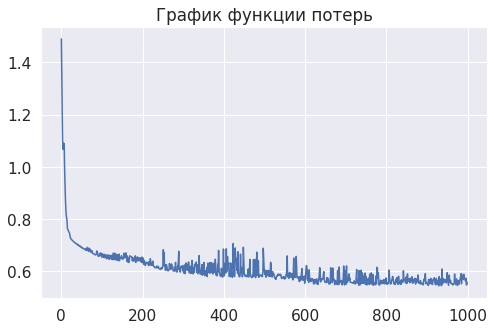

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
plt.title('График функции потерь')
plt.show()

In [22]:
x_test = x_test.T
m = x_test[1]

# Making predictions
A = x_test
for layer in layers:
    A = layer.feedforward(A)
A = np.around(A) # округление, чтобы получить one hote code

y_cap = A.T.copy()

accuracy =  0.7017543859649122
precision =  0.6829268292682927
recall =  0.875


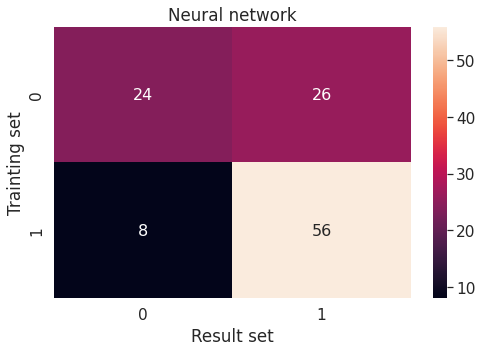

In [27]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_cap)

TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print('accuracy = ', accuracy) 

precision = TP / (TP + FP)
print('precision = ', precision)

recall = TP / (TP + FN)
print('recall = ', recall)

df_cm = pd.DataFrame(conf_matrix, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.xlabel('Result set')
plt.ylabel('Trainting set')
plt.title('Neural network')
plt.show()


accuracy =  0.6842105263157895
precision =  0.675
recall =  0.84375


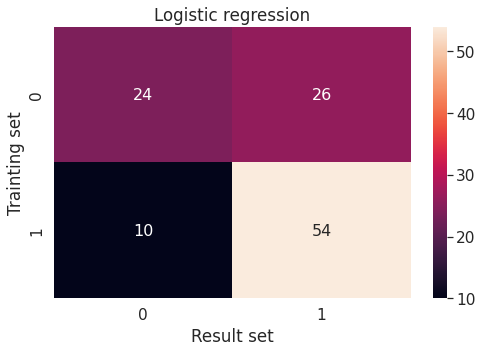

In [29]:
log_conf_matrix = metrics.confusion_matrix(y_test, log_predictions)

TP = log_conf_matrix[1][1]
TN = log_conf_matrix[0][0]
FP = log_conf_matrix[0][1]
FN = log_conf_matrix[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print('accuracy = ', accuracy) 

precision = TP / (TP + FP)
print('precision = ', precision)

recall = TP / (TP + FN)
print('recall = ', recall)

df_cm = pd.DataFrame(log_conf_matrix, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.xlabel('Result set')
plt.ylabel('Trainting set')
plt.title('Logistic regression')
plt.show()
